## define palette

In [217]:
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,3379412,180.5,19775505,1056.2,41814278,2233.2
Vcells,397138986,3030.0,1306516554,9968.0,1306492304,9967.8


In [1]:
require(RColorBrewer)
myPaletteOr <- colorRampPalette(brewer.pal(7, "Oranges"), space="Lab")
myPaletteOr(7)[2:7]

Loading required package: RColorBrewer


[1] "#FDD0A1" "#FDAD6B" "#FD8C3B" "#F16813" "#D84700" "#8C2C04"

In [1]:
# cluster_file <- "/mnt/norbert/data/bridges/clusters.txt"
# clusters <- read.csv(cluster_file, sep="\t", header=F)
# names(clusters) <- c("CHR", "POS1", "POS2", "DIST", "ID")

In [2]:
# read in file of per-individual clusters

ind_cluster_file <- "/mnt/norbert/data/bridges/ind_clusters.txt"
ind_clusters <- read.csv(ind_cluster_file, sep="\t", header=F)

In [3]:
names(ind_clusters) <- c("CHR", "START", "END", "LENGTH", "ID", "N", "SITES", "TYPE_CTS")
ind_clusters <- ind_clusters %>% separate(TYPE_CTS, c("A_C", "A_G", "A_T", "C_T", "C_G", "C_A"), sep=",")

In [4]:
ind_clusters <- ind_clusters %>% 
    mutate(cluster_length=ifelse(
        (LENGTH-1)==N-2, ifelse(LENGTH==1, "tbps2", "tbps2+"), ifelse(LENGTH<=30, "2-30", ifelse(LENGTH<=100, "31-100", ifelse(LENGTH<=1000, "101-1000", "1001-10000"))))) %>% 
    mutate(coord=ifelse(A_C==0 & A_G==0 & A_T==0, "CG", ifelse(C_T==0 & C_G==0 & C_A==0, "AT", "mixed")))
#     mutate(cluster_length=ifelse(cluster_length=="tbps2", ifelse()))

In [5]:
head(ind_clusters)

CHR,START,END,LENGTH,ID,N,SITES,A_C,A_G,A_T,C_T,C_G,C_A,cluster_length,coord
1,1165856,1166086,230,1497-RMM-0002,2,"1165856,1166086",0,1,0,1,0,0,101-1000,mixed
1,1523378,1523382,4,1497-RMM-0002,2,"1523378,1523382",0,2,0,0,0,0,2-30,AT
1,8685418,8685420,2,1497-RMM-0002,2,"8685418,8685420",0,0,2,0,0,0,2-30,AT
1,11114290,11114291,1,1497-RMM-0002,2,"11114290,11114291",0,0,0,1,1,0,tbps2,CG
1,16349782,16349809,27,1497-RMM-0002,2,"16349782,16349809",0,0,0,2,0,0,2-30,CG
1,18813433,18813859,426,1497-RMM-0002,2,"18813433,18813859",0,1,0,1,0,0,101-1000,mixed


In [6]:
sum(ind_clusters$N)/36000000

[1] 0.03479219

In [7]:
ind_clusters %>% dplyr::filter(LENGTH<=5000) %>% summarise(n=sum(N), prop=n/36000000)

n,prop
1251426,0.03476183


In [256]:
summary(ind_clusters$LENGTH)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0     4.0    60.0   161.4   282.0  9527.0 

In [257]:
summary(ind_clusters$N)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   2.000   2.000   2.281   2.000  72.000 

In [244]:
ind_clusters %>% dplyr::filter(grepl("tbps", cluster_length)) %>% group_by(cluster_length) %>% summarise(n=n(), nsites=sum(N)) %>% mutate(pct=n/sum(n))

cluster_length,n,nsites,pct
tbps2,79362,158724,0.95686038
tbps2+,3578,11607,0.04313962


In [241]:
158724/36000000

[1] 0.004409

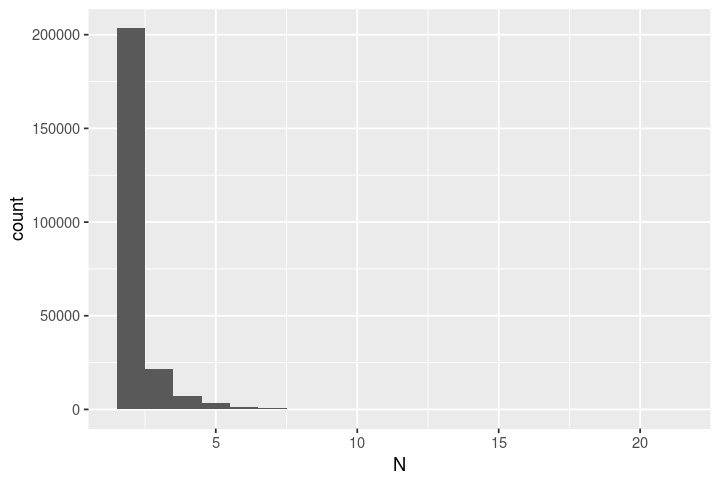

In [239]:
options(repr.plot.width=6, repr.plot.height=4)

ind_clusters %>% dplyr::filter(LENGTH<=100) %>% arrange(desc(N)) %>% ggplot(aes(x=N))+geom_histogram(binwidth=1)

In [235]:
541361/36000000

[1] 0.01503781

In [10]:
# read in file of unclustered ERVs

unclustered_file <- "/mnt/norbert/data/bridges/unclustered.txt"
uncl_sites <- read.csv(unclustered_file, sep="\t", header=F)


In [11]:
names(uncl_sites) <- c("CHR", "POS", "ALT", "REF", "ANC", "AN", "MOTIF", "TYPE", "TYPE2", "BIN", "MASK", "S", "ID")
head(uncl_sites)

CHR,POS,ALT,REF,ANC,AN,MOTIF,TYPE,TYPE2,BIN,MASK,S,ID
1,657915,C,T,.,4142,TGTCAGGAG(CTCCTGACA),AT_GC,AT_GC,1,1,S,1497-RMM-0002
1,830739,T,C,.,7524,CGCCCGCCA(TGGCGGGCG),GC_AT,cpg_GC_AT,1,1,S,1497-RMM-0002
1,849744,T,G,g,7522,AGTGCCCTG(CAGGGCACT),GC_TA,GC_TA,1,0,S,1497-RMM-0002
1,891397,T,C,C,7524,GCTGCAACG(CGTTGCAGC),GC_AT,GC_AT,1,0,S,1497-RMM-0002
1,902005,T,C,C,7522,GGGGCGTGG(CCACGCCCC),GC_AT,cpg_GC_AT,1,0,S,1497-RMM-0002
1,909404,A,G,G,7498,GCGGCCCCC(GGGGGCCGC),GC_AT,GC_AT,1,0,S,1497-RMM-0002


In [121]:
tbps <- ind_clusters %>% dplyr::filter((LENGTH-1)==N-2)

In [123]:
tbps %>% arrange(desc(N)) %>% head

CHR,START,END,LENGTH,ID,N,SITES,A_C,A_G,A_T,C_T,C_G,C_A,cluster_length
7,18025555,18025563,8,1497-RMM-3651,9,"18025555,18025556,18025557,18025558,18025559,18025560,18025561,18025562,18025563",1,2,3,1,1,1,2-10
15,49674844,49674850,6,1497-RMM-0543,7,"49674844,49674845,49674846,49674847,49674848,49674849,49674850",0,1,5,1,0,0,2-10
12,100465094,100465100,6,1497-RMM-2269B,7,"100465094,100465095,100465096,100465097,100465098,100465099,100465100",0,2,3,0,1,1,2-10
10,61076378,61076383,5,1497-RMM-0381,6,"61076378,61076379,61076380,61076381,61076382,61076383",0,1,3,2,0,0,2-10
2,144988756,144988761,5,1497-RMM-0661,6,"144988756,144988757,144988758,144988759,144988760,144988761",2,0,1,0,1,2,2-10
7,83330805,83330810,5,1497-RMM-1003,6,"83330805,83330806,83330807,83330808,83330809,83330810",3,1,1,0,1,0,2-10


In [190]:
min(ind_clusters$N)

[1] 2

Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Removed 35 rows containing missing values (geom_bar).”

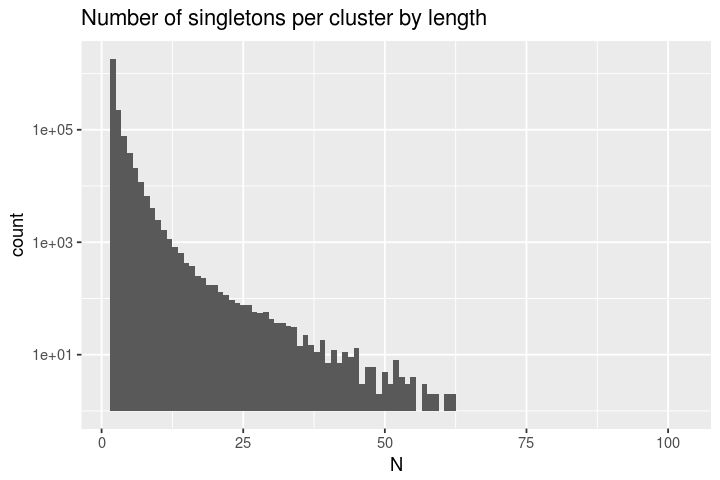

In [199]:
# scatterplot of # singletons per cluster by length

ind_clusters %>%
    dplyr::filter(cluster_length!="tbps2") %>%
    ggplot(aes(x=N))+
         geom_histogram(binwidth=1)+
         scale_y_log10()+
         ggtitle("Number of singletons per cluster by length")

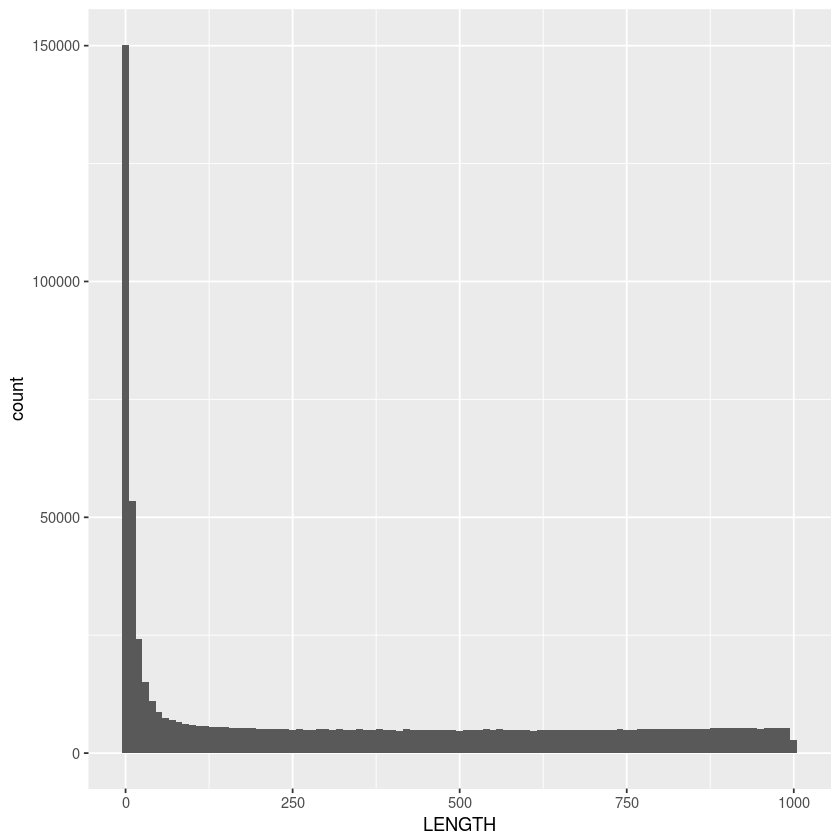

In [33]:
# histogram of cluster lengths

ind_clusters %>% 
    ggplot(aes(x=LENGTH))+
         geom_histogram(binwidth=10)

In [248]:
ind_clusters %>% dplyr::filter(LENGTH<1000) %>% arrange(desc(N)) %>% head(20)

CHR,START,END,LENGTH,ID,N,SITES,A_C,A_G,A_T,C_T,C_G,C_A,cluster_length,coord
19,24509792,24509880,88,1497-RMM-0307,21,"24509792,24509798,24509799,24509800,24509808,24509822,24509824,24509825,24509831,24509836,24509840,24509843,24509846,24509847,24509850,24509859,24509860,24509863,24509864,24509869,24509880",2,9,1,4,5,0,31-100,mixed
15,34190295,34190347,52,1497-RMM-0518,21,"34190295,34190301,34190302,34190307,34190311,34190315,34190320,34190321,34190322,34190323,34190326,34190329,34190330,34190333,34190334,34190338,34190339,34190340,34190344,34190346,34190347",1,5,2,9,1,3,31-100,mixed
7,23679562,23680066,504,1497-RMM-0327RD,20,"23679562,23679570,23679581,23679616,23679643,23679649,23679655,23679681,23679682,23679704,23679753,23679861,23679862,23679902,23679955,23679995,23679996,23680022,23680061,23680066",0,20,0,0,0,0,101-1000,AT
8,46972908,46973095,187,1497-RMM-0341,19,"46972908,46972909,46972913,46972915,46972916,46972921,46972922,46972923,46972940,46972949,46972955,46972956,46972962,46972963,46972964,46972968,46972979,46972981,46973095",2,7,3,7,0,0,101-1000,mixed
14,68090365,68090422,57,1497-RMM-0592,19,"68090365,68090370,68090371,68090373,68090375,68090377,68090382,68090383,68090384,68090396,68090402,68090403,68090404,68090406,68090412,68090414,68090415,68090421,68090422",0,7,1,8,1,2,31-100,mixed
10,70368660,70368740,80,1497-RMM-270,19,"70368660,70368664,70368666,70368668,70368677,70368678,70368679,70368683,70368685,70368691,70368695,70368700,70368707,70368710,70368718,70368733,70368734,70368738,70368740",7,4,2,5,1,0,31-100,mixed
8,90081439,90081506,67,1497-RMM-3293,19,"90081439,90081440,90081442,90081443,90081444,90081448,90081449,90081458,90081459,90081461,90081473,90081481,90081483,90081485,90081487,90081488,90081497,90081499,90081506",1,7,4,4,1,2,31-100,mixed
19,43957440,43957526,86,1497-RMM-3493,19,"43957440,43957441,43957443,43957449,43957450,43957454,43957457,43957465,43957474,43957482,43957483,43957487,43957490,43957491,43957517,43957521,43957522,43957525,43957526",1,9,1,4,2,2,31-100,mixed
12,118819865,118819930,65,1497-RMM-0151,18,"118819865,118819870,118819871,118819875,118819876,118819877,118819879,118819883,118819884,118819887,118819888,118819901,118819911,118819912,118819914,118819925,118819926,118819930",1,6,1,8,0,2,31-100,mixed
19,27979226,27979301,75,1497-RMM-0420,18,"27979226,27979232,27979233,27979236,27979238,27979250,27979259,27979264,27979265,27979266,27979276,27979277,27979279,27979282,27979288,27979289,27979290,27979301",3,5,3,0,4,3,31-100,mixed


In [245]:
options(repr.plot.width=6, repr.plot.height=4)
ind_clusters %>% dplyr::filter(cluster_length=="tbps2+") %>% mutate(spec=paste(A_C, A_G, A_T, C_T, C_G, C_A, sep="")) %>% group_by(spec) %>% summarise(n=n()) %>% arrange(desc(n)) %>% mutate(pct=n/sum(n))

spec,n,pct
010200,212,0.05925098
020100,193,0.05394075
010101,155,0.04332029
011100,137,0.03828955
003000,129,0.03605366
101001,120,0.03353829
010110,116,0.03242035
011001,96,0.02683063
001101,89,0.02487423
110100,89,0.02487423


In [6]:
clustered_spectra <- ind_clusters %>% 
    gather(type, count, A_C:C_A) %>% 
    arrange(CHR, START, type) %>% 
#     group_by(CHR, cluster_length, type) %>% 
    group_by(cluster_length, type) %>% 
    dplyr::summarise(count=sum(as.numeric(count))) %>%
    mutate(prop=count/sum(count)) %>%
    mutate(type=gsub("_", ">", type))

In [7]:
clustered_spectra


cluster_length,type,count,prop
1001-10000,A>C,2733,0.07896790
1001-10000,A>G,11080,0.32014794
1001-10000,A>T,2581,0.07457598
1001-10000,C>A,3073,0.08879193
1001-10000,C>G,2945,0.08509347
1001-10000,C>T,12197,0.35242278
101-1000,A>C,39768,0.07419832
101-1000,A>G,137836,0.25717159
101-1000,A>T,40982,0.07646338
101-1000,C>A,54654,0.10197232


In [8]:
cats <- c("AT_CG", "AT_GC", "AT_TA", "GC_TA", "GC_CG", "GC_AT")
newcats <- unique(clustered_spectra$type)

cats
newcats

[1] "AT_CG" "AT_GC" "AT_TA" "GC_TA" "GC_CG" "GC_AT"

[1] "A>C" "A>G" "A>T" "C>A" "C>G" "C>T"

In [13]:
unclustered_spectra <- uncl_sites %>% 
group_by(TYPE) %>% 
summarise(count=n()) %>% 
mutate(cluster_length="unclustered", prop=count/sum(count)) %>% 
mutate(type = plyr::mapvalues(TYPE, cats, newcats)) %>% 
dplyr::select(cluster_length, type, count, prop)

unclustered_spectra

cluster_length,type,count,prop
unclustered,A>C,2500305,0.07284867
unclustered,A>G,9358139,0.27265795
unclustered,A>T,2374187,0.06917411
unclustered,C>T,13596956,0.39615976
unclustered,C>G,3007404,0.08762347
unclustered,C>A,3484910,0.10153604


In [155]:
ind_clusters %>% group_by(cluster_length, CHR) %>% summarise(n=n())

cluster_length,CHR,n
101-1000,1,33203
101-1000,2,40690
101-1000,3,31884
101-1000,4,31561
101-1000,5,29196
101-1000,6,27402
101-1000,7,26910
101-1000,8,29000
101-1000,9,21856
101-1000,10,21825


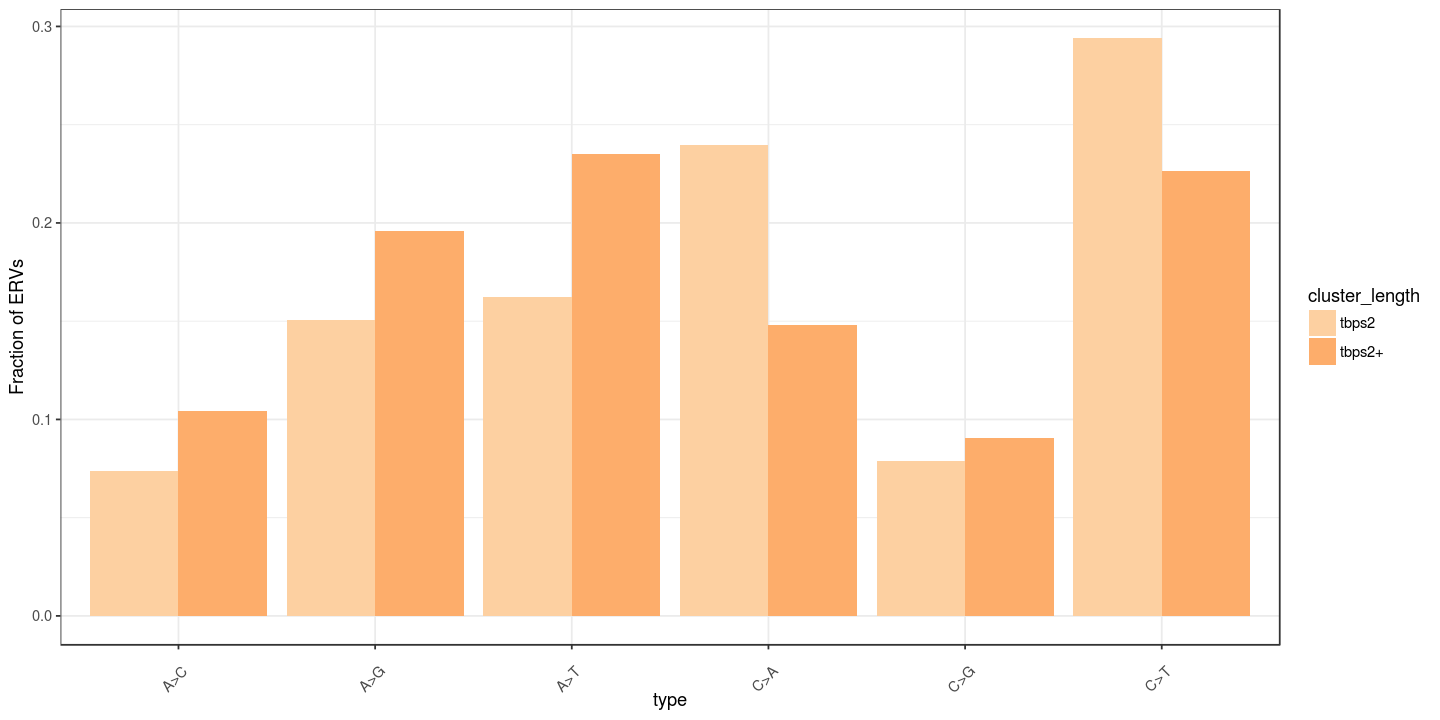

In [14]:
options(repr.plot.width=12, repr.plot.height=6)

rbind(data.frame(clustered_spectra), data.frame(unclustered_spectra)) %>%
data.frame() %>%
mutate(cluster_length=factor(cluster_length, levels=c("tbps2", "tbps2+", "2-30", "31-100", "101-1000", "1001-10000", "unclustered"))) %>%
dplyr::filter(grepl("tbps", cluster_length)) %>%
ggplot(aes(x=type, y=prop, group=cluster_length, fill=cluster_length))+
    geom_col(position="dodge")+
    ylab("Fraction of ERVs")+
    scale_fill_manual(values=c(myPaletteOr(7)[2:7], "black"))+
#     facet_wrap(~type)+
    theme_bw()+
    theme(axis.text.x=element_text(angle=45, vjust= 0))
#         facet_wrap(~group)

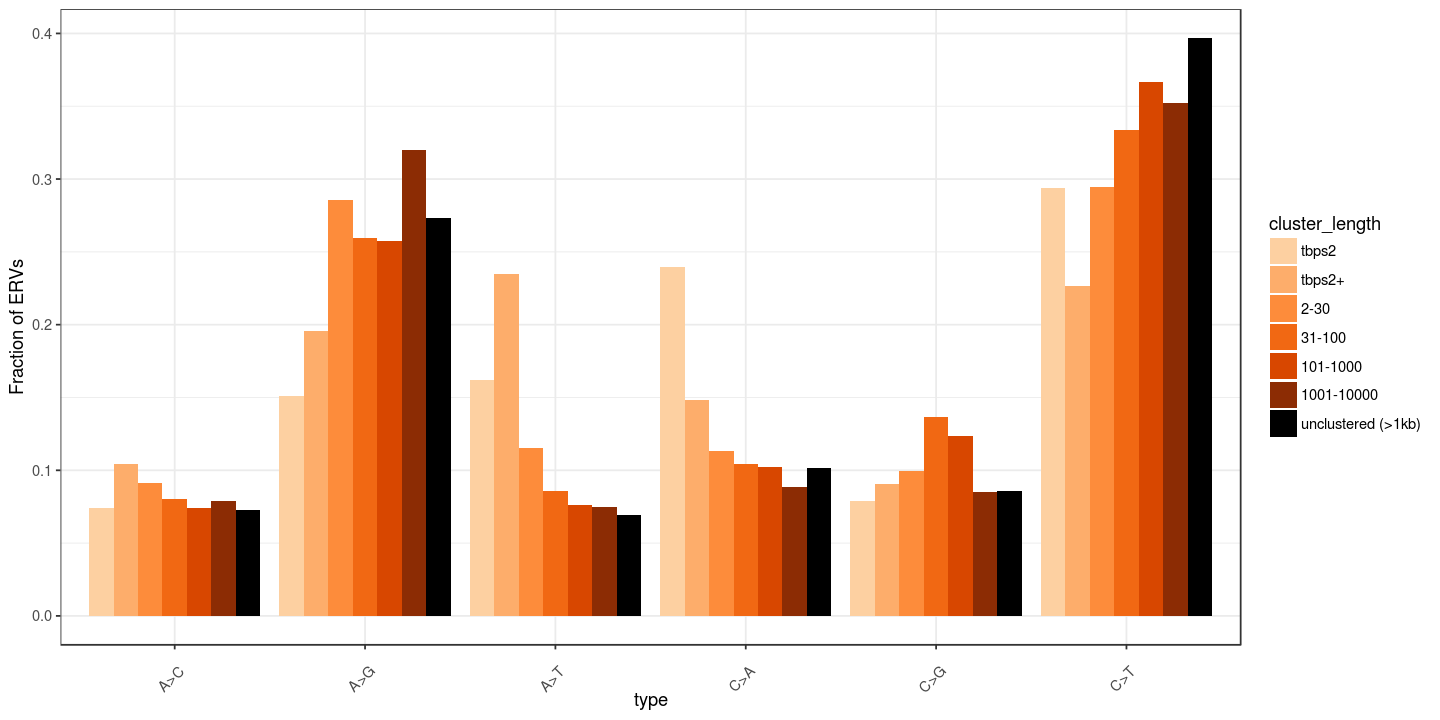

In [279]:
options(repr.plot.width=12, repr.plot.height=6)

rbind(data.frame(clustered_spectra), data.frame(unclustered_spectra)) %>%
data.frame() %>%
mutate(cluster_length=factor(cluster_length, levels=c("tbps2", "tbps2+", "2-30", "31-100", "101-1000", "1001-10000", "unclustered (>1kb)"))) %>%
ggplot(aes(x=type, y=prop, group=cluster_length, fill=cluster_length))+
    geom_col(position="dodge")+
    ylab("Fraction of ERVs")+
    scale_fill_manual(values=c(myPaletteOr(7)[2:7], "black"))+
#     facet_wrap(~type)+
    theme_bw()+
    theme(axis.text.x=element_text(angle=45, vjust= 0))
#         facet_wrap(~group)

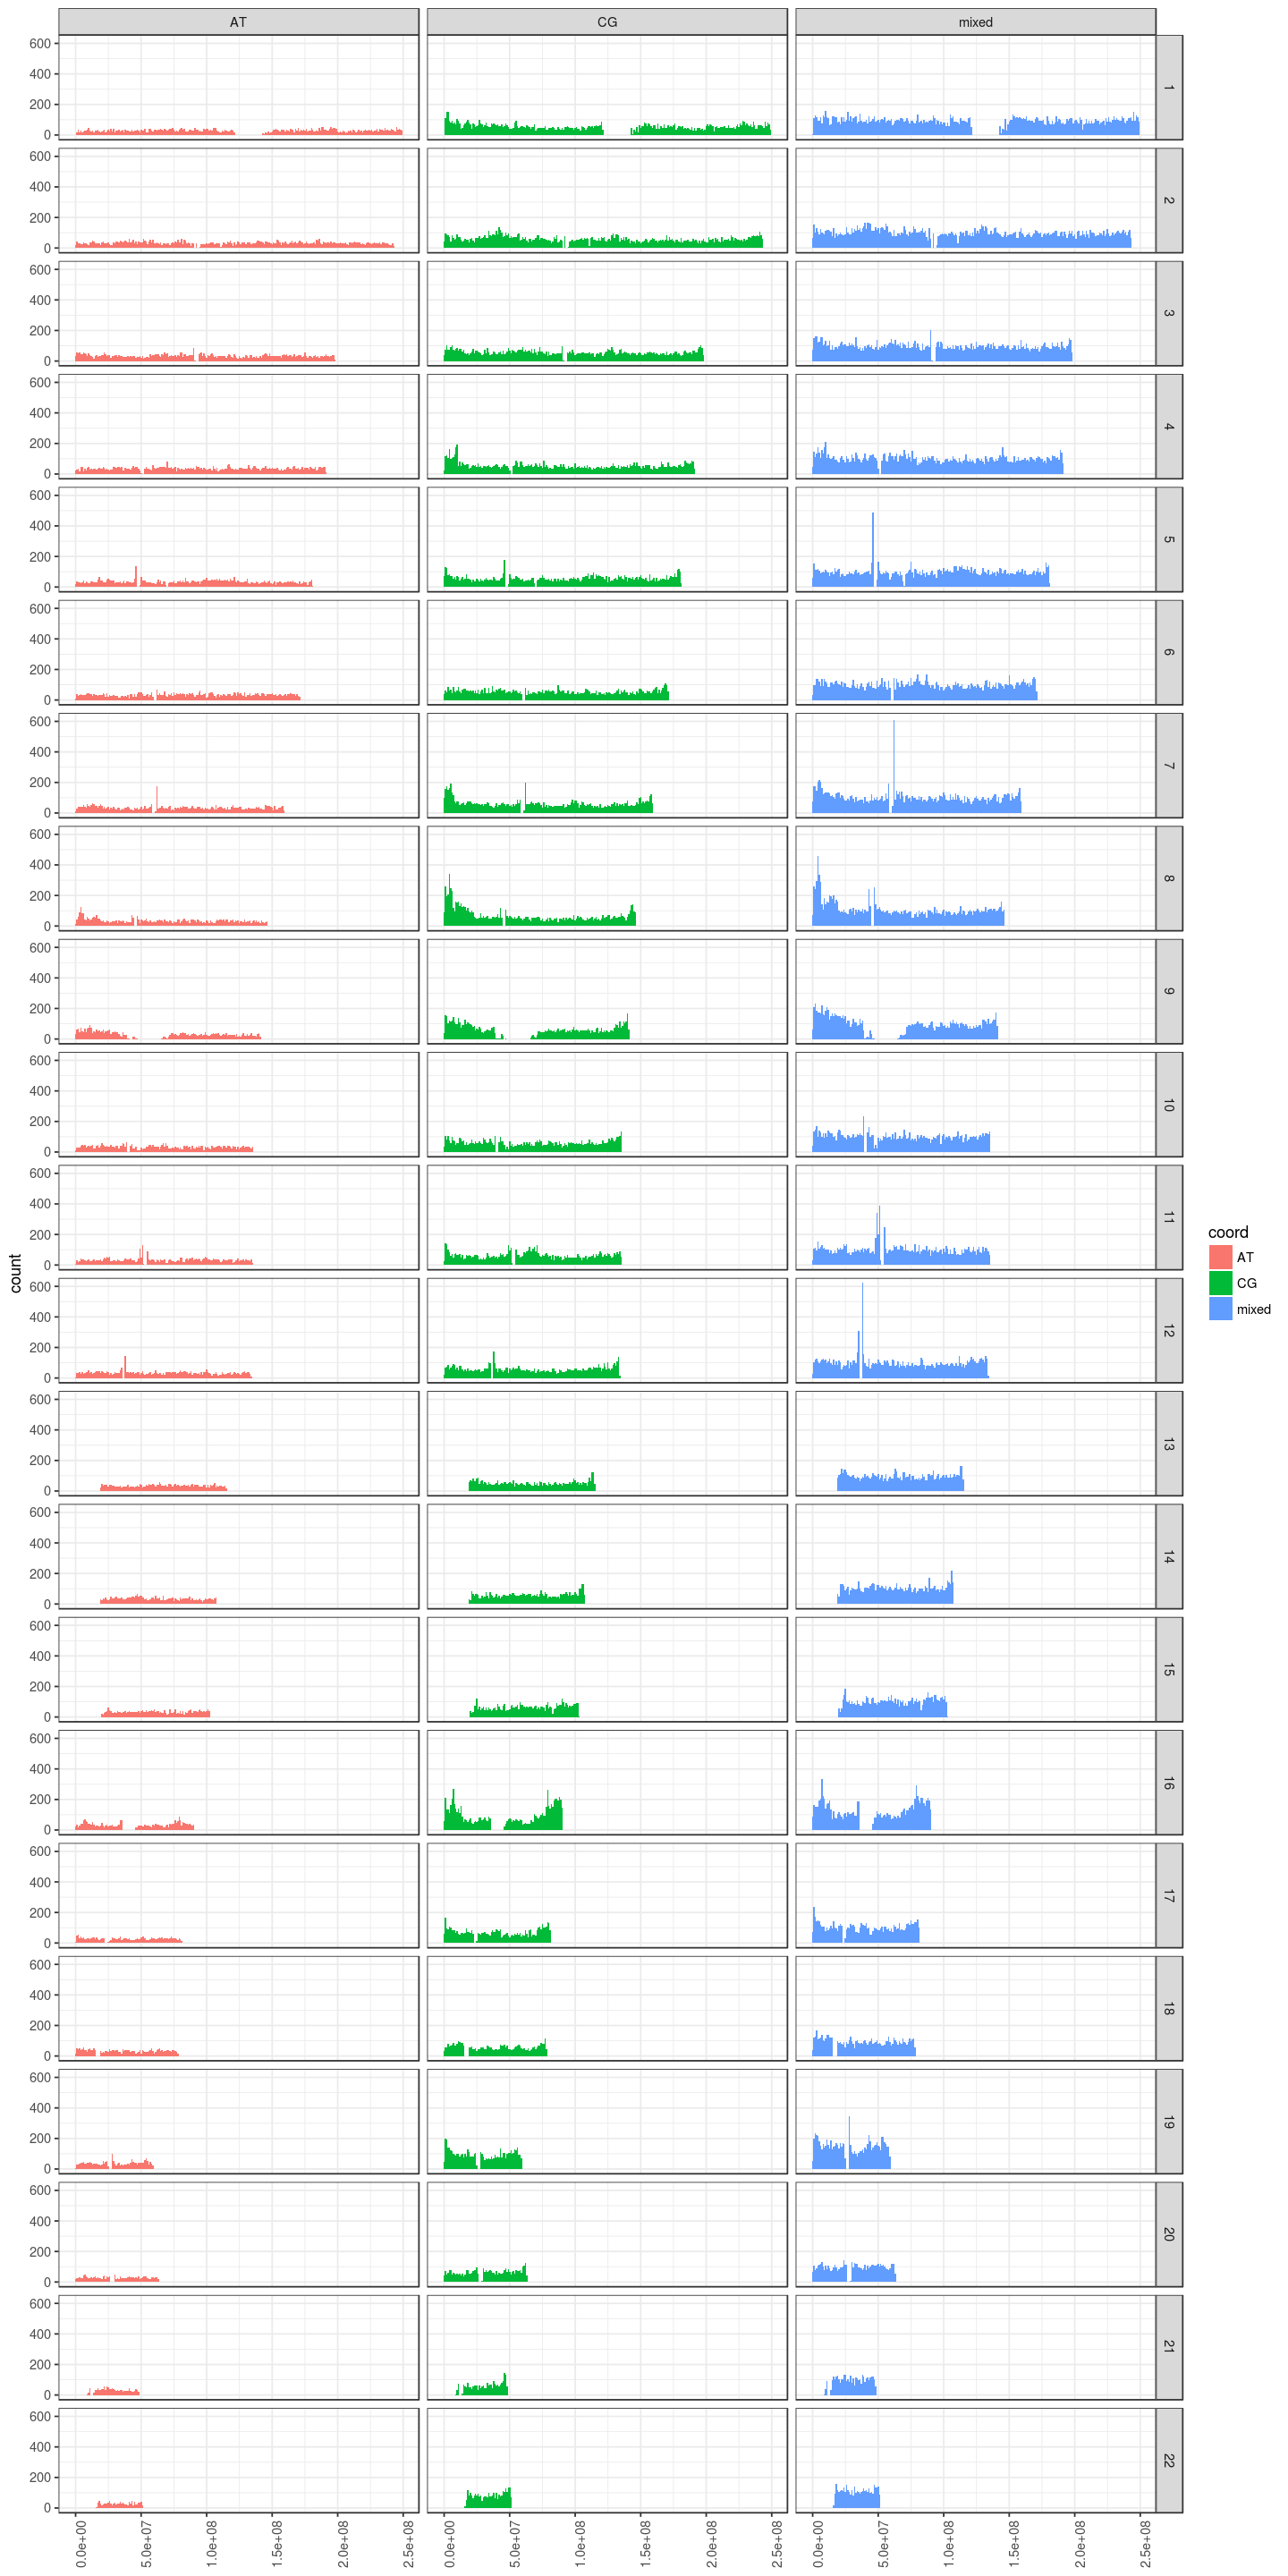

In [277]:
library(repr)
options(repr.plot.width=12, repr.plot.height=24)

ind_clusters %>% 
# dplyr::filter(LENGTH<=500) %>%
# dplyr::filter(!grepl("1001", cluster_length)) %>%
# mutate(cluster_length=factor(cluster_length, levels=c("tbps2", "tbps2+"))) %>%
# mutate(cluster_length=factor(cluster_length, levels=c("tbps2", "tbps2+", "2-30", "31-100", "101-1000", "1001-10000"))) %>%
ggplot(aes(x=START, fill=coord))+
    geom_histogram(binwidth=1e6)+
#     scale_fill_manual(values=c(myPaletteOr(7)[2:7]))+
    facet_grid(CHR~coord)+
    theme_bw()+
#     geom_hline(yintercept=500)+
    theme(axis.text.x=element_text(angle=90),
         axis.title.x=element_blank())

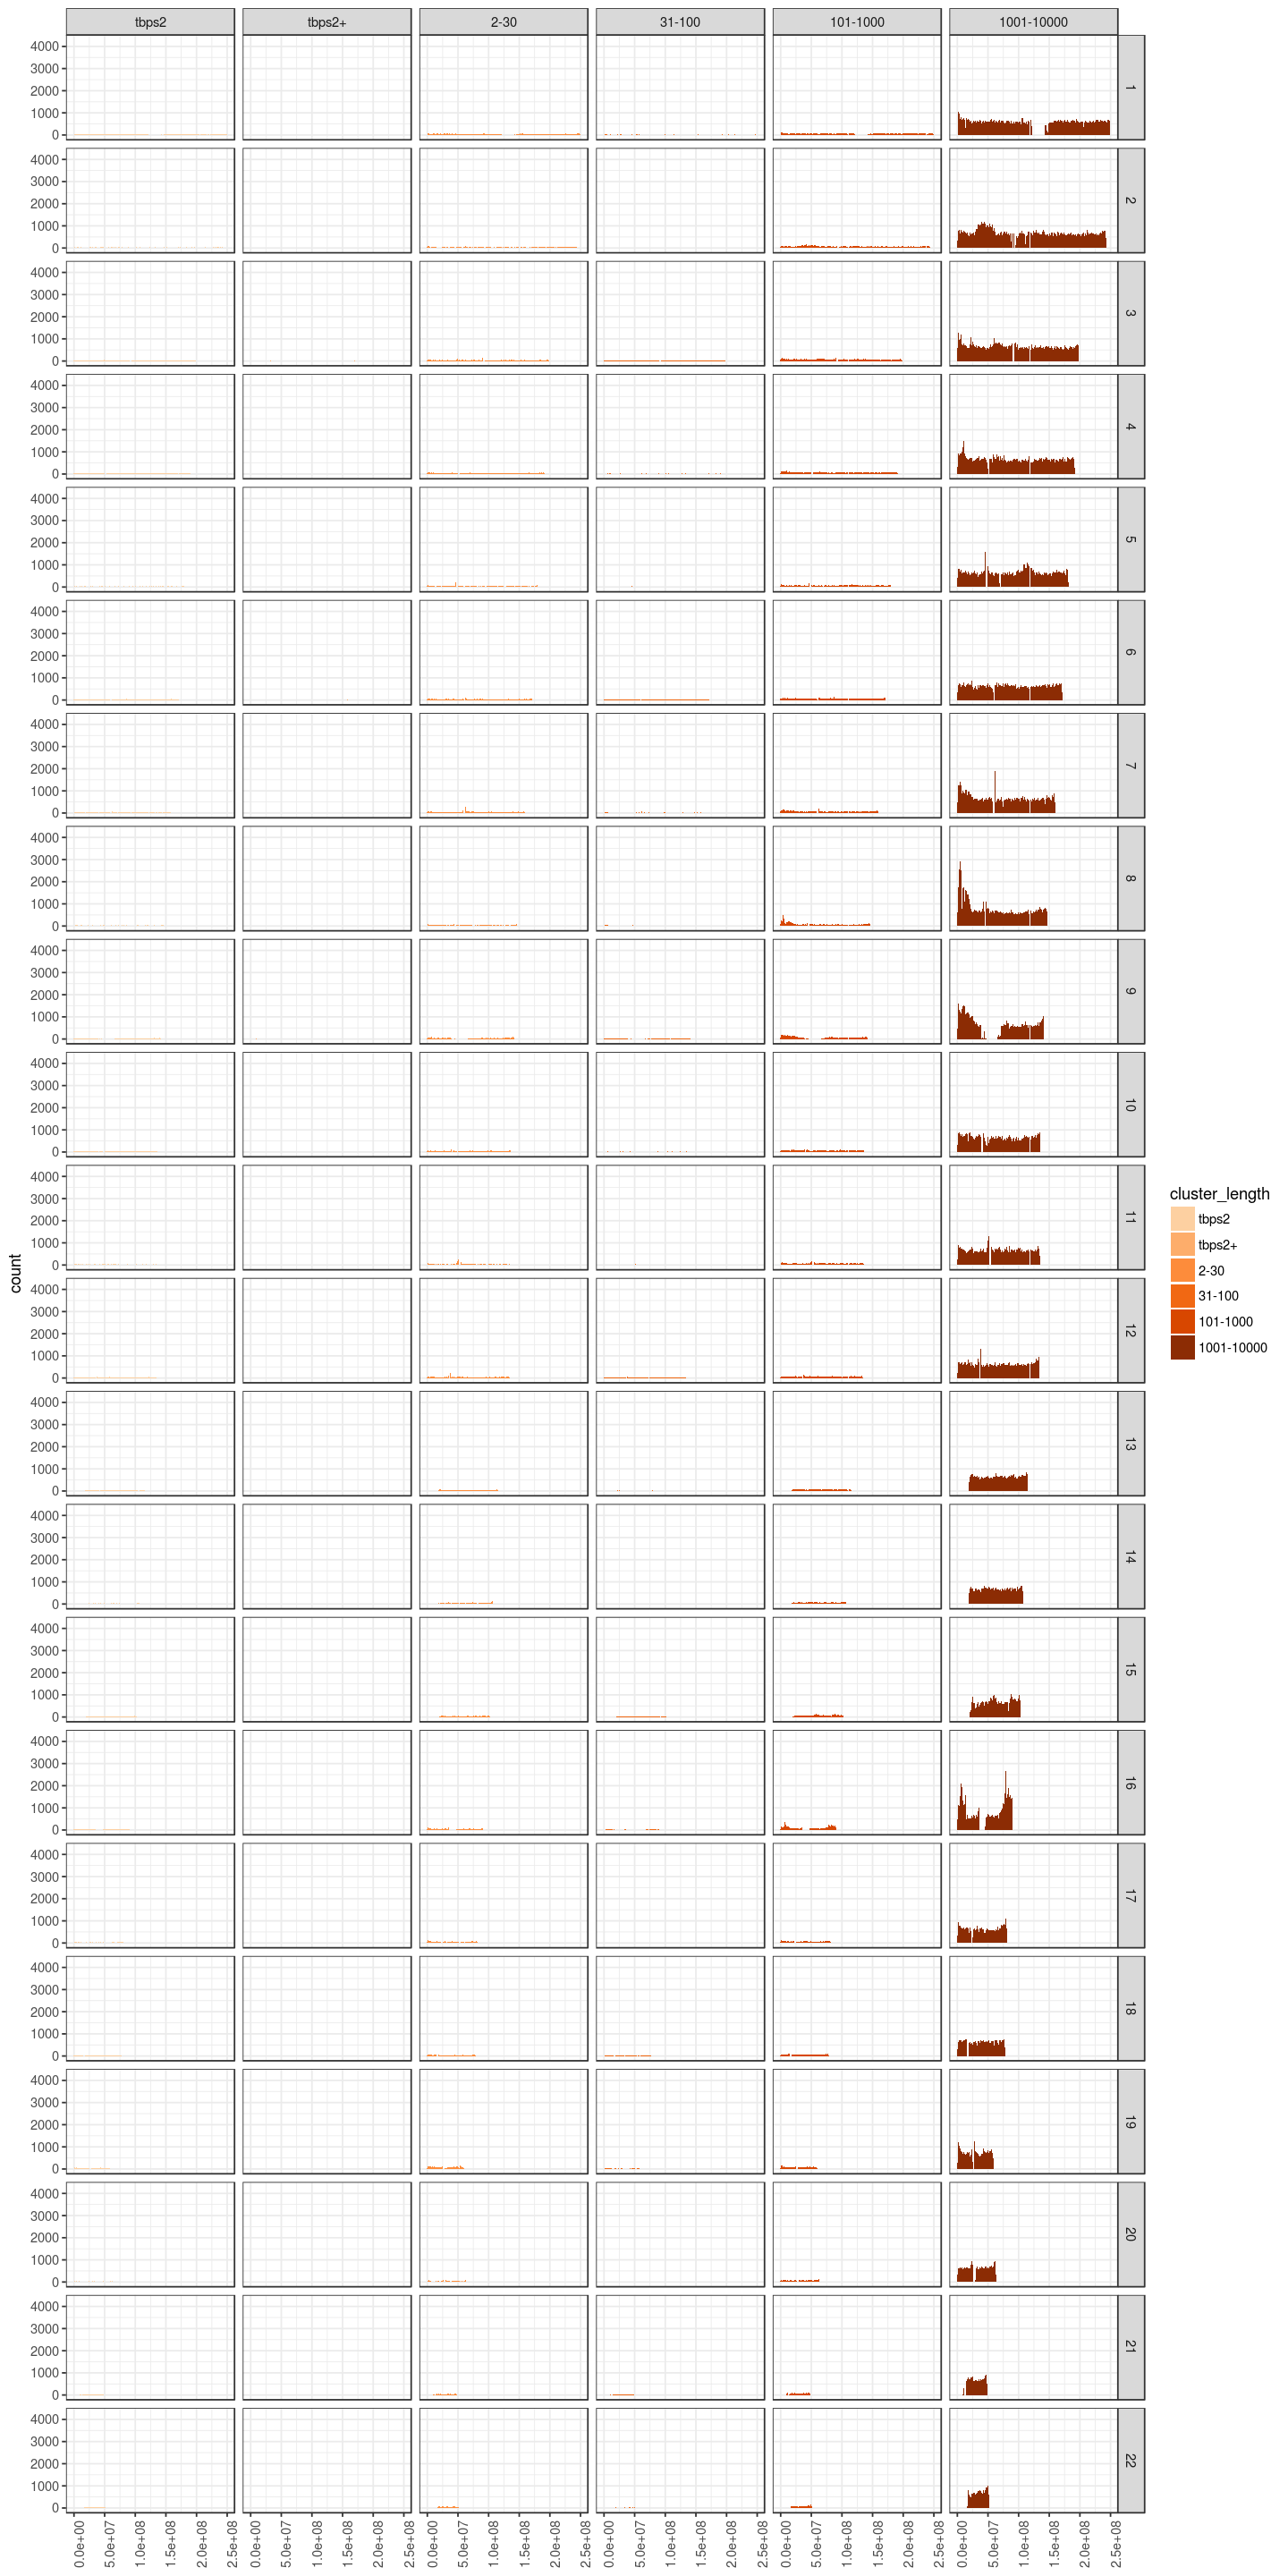

In [172]:
library(repr)
options(repr.plot.width=12, repr.plot.height=24)

ind_clusters %>% 
# dplyr::filter(LENGTH<=500) %>%
# dplyr::filter(grepl("tbps", cluster_length)) %>%
# mutate(cluster_length=factor(cluster_length, levels=c("tbps2", "tbps2+"))) %>%
mutate(cluster_length=factor(cluster_length, levels=c("tbps2", "tbps2+", "2-30", "31-100", "101-1000", "1001-10000"))) %>%
ggplot(aes(x=START, fill=cluster_length))+
    geom_histogram(binwidth=1e6)+
    scale_fill_manual(values=c(myPaletteOr(7)[2:7]))+
    facet_grid(CHR~cluster_length)+
    theme_bw()+
#     geom_hline(yintercept=500)+
    theme(axis.text.x=element_text(angle=90),
         axis.title.x=element_blank())

In [16]:
clusters$bin <- ceiling(clusters$POS1/1e6)

tail(clusters)
# ggplot(mtcars, aes(x=cyl, y=mpg))+geom_point()

,CHR,POS1,POS2,DIST,ID,bin
364105,22,49926045,49926051,6,1497-RMM-0475RD,50
364106,22,49926051,49926053,2,1497-RMM-0475RD,50
364107,22,49926139,49926140,1,1497-RMM-2488B,50
364108,22,49931852,49931866,14,1497-RMM-1943B,50
364109,22,49938498,49938529,31,1497-RMM-1300,50
364110,22,49941030,49941033,3,1497-RMM-3646,50


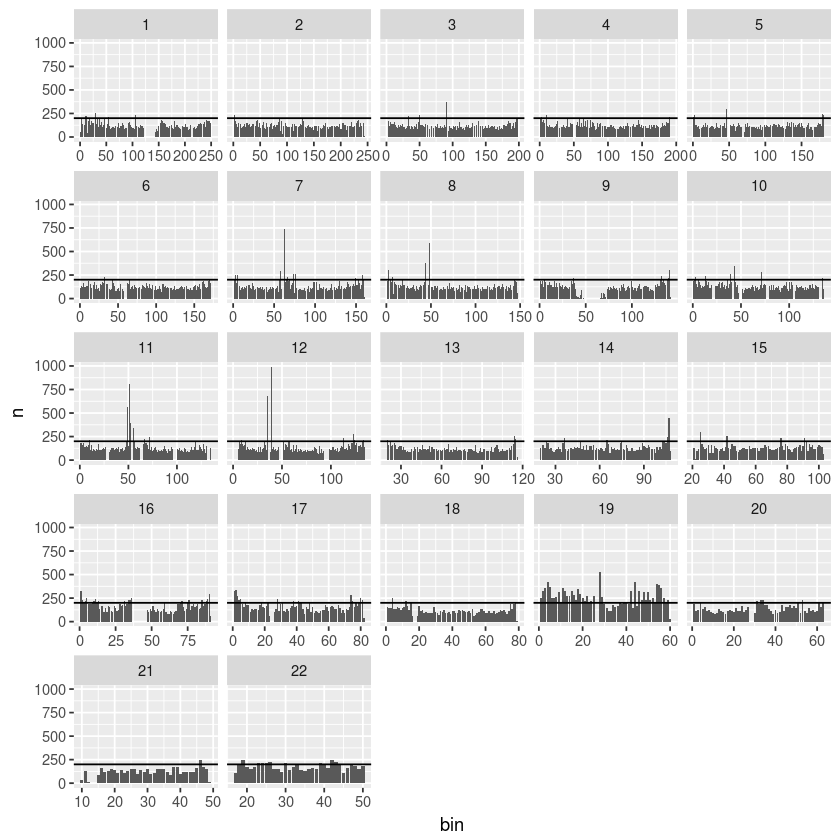

In [23]:
clusters %>% group_by(CHR, bin) %>% summarise(n=n()) %>% ggplot(aes(x=bin, y=n))+geom_bar(stat="identity")+facet_wrap(~CHR, scales="free_x")+geom_hline(yintercept=200)

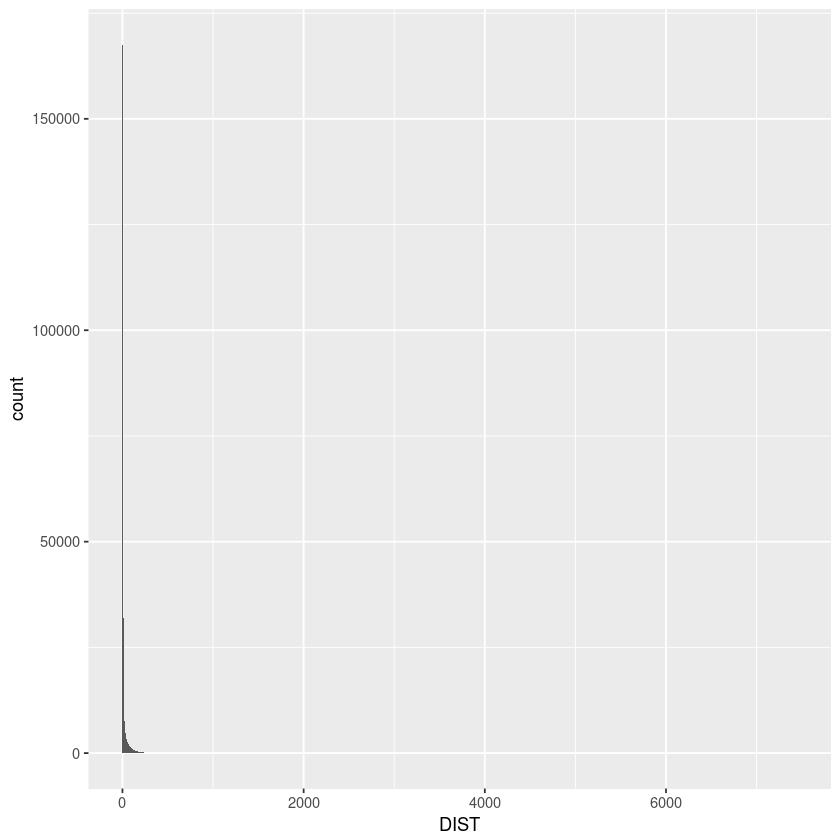

In [14]:
ggplot(clusters, aes(x=DIST))+geom_histogram(binwidth=5)

In [7]:
require(tidyverse)